## 3) Build an Interest Rate ESG
Our objective is to first build a model fit to historical treasury yields, then use it to simulate future yeilds by adding random noise. To acheive this, we will be using a very comprehensive statistical package for python, 'statsmodels'.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load Historical Treasury Rates
Recall the historical treasury rate dataset we cleaned before.

#### TASK 0
Load in the cleaned historical treasury yield curve dataset from last week.

In [ ]:
treasury_frame = 
treasury_frame.head()

In [ ]:
###What is the shape of this dataset, and how to interpret?
treasury_frame.shape

#### Yield Curve Fitting
We will use Nelson-Siegal model to estimate the yield curve, then simulate the beta coefficients. 

The below equation gives the yield _y_ for a Treasury maturing at time _t_. _y(t)_ for _t_ ranging from 3-months to 30-years makes up one yield curve. Yield curves will vary from day-to-day as market prices of treasury bonds change.

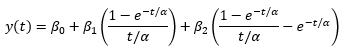

To make things easier, we will fix the parameter alpha = 1.4, which will turn the NS factors into constants for each tenor.

#### TASK 1

If lambda is fixed, then the expressions multiplying with the beta coefficients only vary by t. Let's call them the NS factors. Write a function that returns the NS factors to our Nelson-Siegal model for a given list of tenors.

In [ ]:
tenors = np.array([1. / 12., 3. / 12, 6. / 12, 1., 2., 3., 5., 7., 10., 20., 30.])

def NS_factors_function(tenors, alpha = 1.4):
    ###WRITE CODE HERE
    
    
    
    
    return NS_factors

NS_factors_function(tenors)

In [ ]:
###Save these factors for use later by storing in a dataframe
NS_factors = NS_factors_function(tenors)
pd.DataFrame(NS_factors, columns = ['X0', 'X1', 'X2'])

Our Nelson-Siegal model now looks something like this (look familiar?):
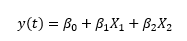

#### Linear Regression
We will use a OLS regression to estimate the beta coefficients of our Nelson-Siegal model, fitting to history.

#### TASK 2

Fit a linear regression to a single historical yeild curve.

In [ ]:
treasury_frame.values[0, :]

In [ ]:
from statsmodels.api import OLS

model =     ###WRITE CODE HERE




Lets visually examine the regression to see how well it fit to the historical yeild curve.

In [ ]:
###WRITE CODE HERE




#### TASK 3
Wrap what we just did in task 2 into functions, so that it can be easily applied to our entire dataset.

In [ ]:
def NS_model_fit(historical_yields, NS_factors):
    ###WRITE CODE HERE
    
    
    
    return betas


def NS_model_curve(betas, NS_factors):    
    ###WRITE CODE HERE
    
    
    
    return model_curve

    
def plot_NS_yield_curve(NS_curve, historical_curve = None, tenors = tenors):
    ###WRITE CODE HERE
    
    
    

In [ ]:
betas = NS_model_fit(treasury_frame.values[0, :], NS_factors)
print(betas)

model_curve = NS_model_curve(betas, NS_factors)
print(model_curve)

plot_NS_yield_curve(model_curve, treasury_frame.values[0, :])

#### TASK 4
Loop through all historical yield curves to estimate a set of betas for each historical yield curve using the functions we created in task 3.

In [ ]:
###WRITE CODE HERE
    
    
    

Lets spot check a few curves. Do they look good?

In [ ]:
for i in [0, 100, 1000, -1000, -100, -1]:
    plot_NS_yield_curve()

#### Forecasting Beta Coefficients
We now obtained historical time series of each beta coefficient for the NS-model. Now we will build a model that can forecast future betas. To do this, we will use a Vector Auto-Regressive (VAR) Model. 

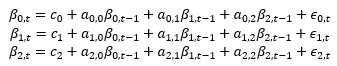

#### TASK 5
Fit a VAR model to our historical beta coefficients obtained from Task 4. Then forecast betas for the next year (250 trading days) in the future.

In [ ]:
from statsmodels.tsa.api import VAR

VAR_model =     ###WRITE CODE HERE
    
    
    
print(f'VAR Lag Order: {VAR_model.k_ar}')
VAR_model.summary()

In [ ]:
###Forecast future beta values for next year






In [ ]:
###Splot check a few forecasted yield curves using the forecasted betas





#### Simulation
Our VAR model can now produce forecasts of the __expected path__ for each beta coefficient in the NS-model. To turn these forecasts into simulations, we need to add randomness to the VAR predictions. This will give us a __distribution__ of future paths, _aka_ stochastic simulation.

#### TASK 6

Simulate __10000 trials__ of yield curves for __250 days__, with each yield curve described by __3 beta coefficients__ of a NS-model. Plot the generated time series of betas and visually inspect results for reasonableness.

In [ ]:
###To do simulation, we need to generate some random draws from a multivariate normal distribution





In [ ]:
def plot_beta_time_series(beta_series):
    ###WRITE CODE HERE
    
    
    
plot_beta_time_series(forecasted_NS_betas)

In [ ]:
###Lets spot check a few scenarios
plot_beta_time_series(simulated_NS_betas[1, :, :])
plot_beta_time_series(simulated_NS_betas[10, :, :])
plot_beta_time_series(simulated_NS_betas[100, :, :])
plot_beta_time_series(simulated_NS_betas[-11, :, :])

#### TASK 7
Turn the simulation of betas from Task 6 into simulations of yield curves.

In [ ]:
###Lets spot check a few yield curves
plot_NS_yield_curve(NS_curve = NS_model_curve(simulated_NS_betas[0, 30, :], NS_factors))
plot_NS_yield_curve(NS_curve = NS_model_curve(simulated_NS_betas[0, 120, :], NS_factors))
plot_NS_yield_curve(NS_curve = NS_model_curve(simulated_NS_betas[1000, 30, :], NS_factors))
plot_NS_yield_curve(NS_curve = NS_model_curve(simulated_NS_betas[1000, 200, :], NS_factors))

In [ ]:
simulated_yield_curves = np.empty((500, 250, 11)) #cutting down on the sample to run faster
simulated_yield_curves[:] = np.nan

###WRITE CODE HERE
    
    
    




#### TASK 8
Plot the distribution of simulated 10 year treasury yields. How does it compare to the historical distribution?

In [ ]:
###WRITE CODE HERE





#### TASK 9
What is the average correlation between 1-month treasury and 30-year treasury yields according to our simulation? How does this value compare to history? What is its distribution?

In [ ]:
###WRITE CODE HERE



